In [56]:
import confluent_kafka
import time
import uuid
import pandas as pd
import seaborn as sns
from datetime import timezone, datetime
#%pylab inline

In [57]:
msg_count = 32000
msg_size = 100
msg_payload = ('kafkatest' * 20).encode()[:msg_size]
print(msg_payload)
print(len(msg_payload))


b'kafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestkafkatestk'
100


In [58]:
bootstrap_servers = 'localhost:9092' 
consumer_timings = {}

In [59]:
def calculate_thoughput(timing, n_messages=1000000, msg_size=100):
    print("Processed {0} messsages in {1:.2f} seconds".format(n_messages, timing))
    print("{0:.2f} MB/s".format((msg_size * n_messages) / timing / (1024*1024)))
    print("{0:.2f} Msgs/s".format(n_messages / timing))

In [60]:
def confluent_kafka_consumer_performance():
    
    topic = 'confluent-kafka-topic'
    msg_consumed_count = 0
    conf = {'bootstrap.servers': bootstrap_servers,
            'group.id': uuid.uuid1(),
            'session.timeout.ms': 6000,
            'default.topic.config': {
                'auto.offset.reset': 'earliest'
            }
    }

    consumer = confluent_kafka.Consumer(**conf)

    #consumer_start = time.time()
    # This is the same as pykafka, subscribing to a topic will start a background thread
    consumer.subscribe([topic])

    while True:
        msg = consumer.poll(1)
        if msg:
            msg_consumed_count += 1
                         
        if msg_consumed_count >= msg_count:
            break
                    
    #consumer_timing = time.time() - consumer_start
    consumer.close()    
    #return consumer_timing


In [61]:
total_docs=0
j=0
itr=0
MAX_ITR=60
startf = datetime.now();
read_readings={}

while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(100000000000):
        try:
            #_ = confluent_kafka_consumer_performance() # Warm cache
            confluent_kafka_consumer_performance()
            
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                j=j+1
                itr=itr+1
                read_readings[j]=index*msg_count
                total_docs=total_docs + index*msg_count
                break
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
#consumer.close()            
print ('Read',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average read per second is :',total_docs/MAX_ITR)
    

Read 11936000  in  64.268099 s
average read per second is : 198933.33333333334


In [62]:
for i in read_readings:
    print('(',i,',',read_readings[i],')',sep='')

(1,352000)
(2,160000)
(3,160000)
(4,160000)
(5,192000)
(6,352000)
(7,160000)
(8,192000)
(9,192000)
(10,352000)
(11,224000)
(12,160000)
(13,160000)
(14,192000)
(15,320000)
(16,192000)
(17,224000)
(18,160000)
(19,160000)
(20,352000)
(21,128000)
(22,192000)
(23,160000)
(24,224000)
(25,256000)
(26,192000)
(27,160000)
(28,192000)
(29,224000)
(30,224000)
(31,224000)
(32,160000)
(33,160000)
(34,160000)
(35,128000)
(36,160000)
(37,192000)
(38,160000)
(39,224000)
(40,160000)
(41,160000)
(42,192000)
(43,192000)
(44,224000)
(45,192000)
(46,192000)
(47,160000)
(48,256000)
(49,160000)
(50,160000)
(51,192000)
(52,160000)
(53,192000)
(54,192000)
(55,192000)
(56,192000)
(57,192000)
(58,224000)
(59,224000)
(60,192000)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1ae819550>],
      dtype=object)

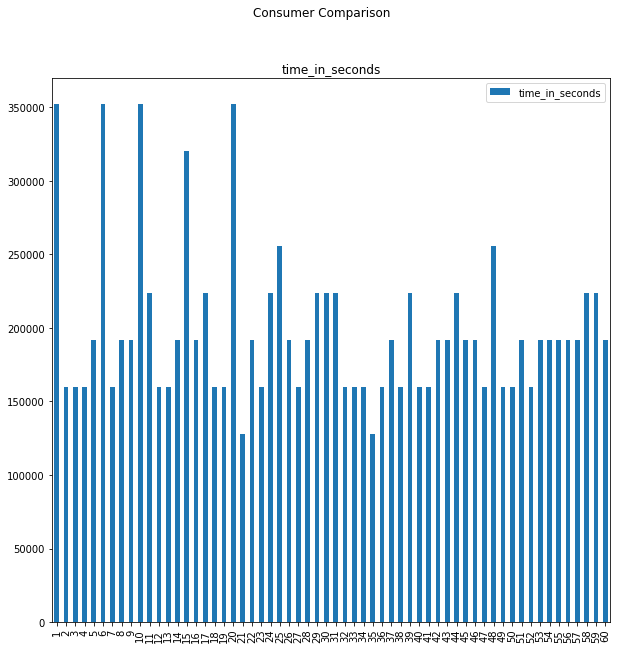

In [63]:
consumer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'time_in_seconds'})
consumer_df.sort_index(inplace=True)
consumer_df

consumer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Consumer Fixed Batch")